In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment', None)
palette=sns.color_palette('magma')
sns.set(palette=palette)

In [3]:
train_data=pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
test_data=pd.read_csv('Corona_NLP_test.csv', encoding='latin-1')

train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
test_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [5]:
train_data.shape

(41157, 6)

In [6]:
test_data.shape

(3798, 6)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


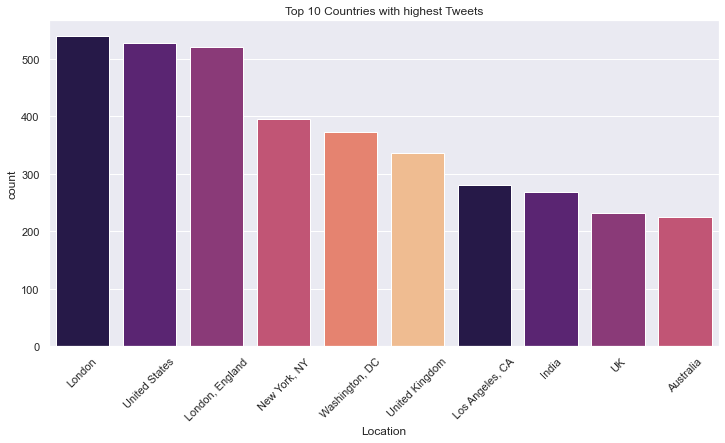

In [8]:
plt.figure(figsize=(12,6))
plt.title('Top 10 Countries with highest Tweets')
countries =sns.countplot(x='Location', data=train_data, order=train_data['Location'].value_counts().index[:10], palette=palette)
countries.set_xticklabels(countries.get_xticklabels(), rotation=45)
plt.show() 

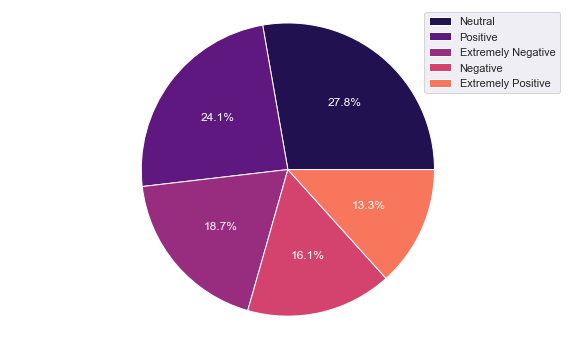

In [9]:
#Pie Chart for the Sentiments Percentage 
plt.figure(figsize=(10,6))
plt.pie(train_data['Sentiment'].value_counts(), labels=train_data['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()


In [11]:
#WordCloud for the Sentiments
train_df= train_data[['OriginalTweet','Sentiment']]
test_df= test_data[['OriginalTweet','Sentiment']]

train_df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [12]:
train_df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [13]:
test_df.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [14]:
#Mapping the target column to {Negative/Neutral/Positive}
target_mapping={'Extremely Negative':0, 'Negative':0, 'Neutral':1,
                'Positive':2, 'Extremely Positive':2}
train_df['SentimentMapped']=train_df['Sentiment'].map(lambda x:target_mapping[x])
test_df['SentimentMapped']=test_df['Sentiment'].map(lambda x:target_mapping[x])

train_df.head()

,OriginalTweet,Sentiment,SentimentMapped
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,1
1,advice Talk to your neighbours family to excha...,Positive,2
2,Coronavirus Australia: Woolworths to give elde...,Positive,2
3,My food stock is not the only one which is emp...,Positive,2
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0


In [25]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

def preprocessor(data):
    corpus = []
    for i in range(len(data)):
        #remove urls
        tweet1= re.sub(r'http\S+', ' ', data['OriginalTweet'][i])
        #remove html tags
        tweet2 = re.sub(r'<.*?>',' ', tweet1) 
        #remove digits
        tweet3 = re.sub(r'\d+',' ', tweet2)
        #remove hashtags
        tweet4 = re.sub(r'#\w+',' ', tweet3)
        review = re.sub('[^a-zA-Z]', ' ', tweet4)
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if word not in all_stopwords]
        review = ' '.join(review)
        corpus.append(review)
    return corpus   

In [16]:
pip install nltk

In [24]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
#Transforming the OriginalTweet 
corpus_train=preprocessor(train_df)
corpus_test=preprocessor(test_df)

#Displaying the first 5 rows in corpus_train
corpus_train[0:5]

['menyrbi phil gahan chrisitv',
 'advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med not order',
 'coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak',
 'food stock not one empti pleas panic enough food everyon not take need stay calm stay safe franc',
 'readi go supermarket outbreak not paranoid food stock litterali empti seriou thing pleas panic caus shortag']

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import re
import string

In [30]:
train=pd.read_csv('Corona_NLP_train.csv',encoding='latin-1')
test=pd.read_csv('Corona_NLP_test.csv',encoding='latin-1')

<AxesSubplot:>

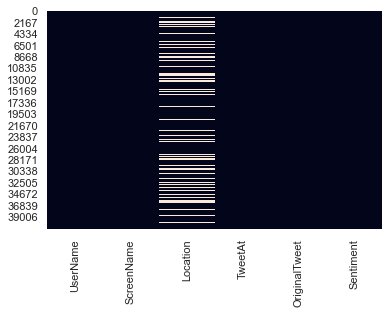

In [31]:
sns.heatmap(train.isnull(),cbar=False)

In [32]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


<AxesSubplot:>

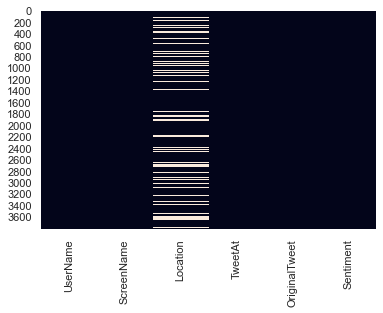

In [33]:
sns.heatmap(test.isnull(),cbar=False)

In [34]:
test.groupby('Sentiment').count()

,UserName,ScreenName,Location,TweetAt,OriginalTweet
Sentiment,,,,,
Extremely Negative,592,592,449,592,592
Extremely Positive,599,599,482,599,599
Negative,1041,1041,811,1041,1041
Neutral,619,619,497,619,619
Positive,947,947,725,947,947


In [35]:
train['char_count'] = train['OriginalTweet'].apply(lambda x: len(str(x)))
# mention_count
train['mention_count'] = train['OriginalTweet'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [36]:
test['char_count'] = test['OriginalTweet'].apply(lambda x: len(str(x)))
# mention_count
test['mention_count'] = test['OriginalTweet'].apply(lambda x: len([c for c in str(x) if c == '@']))
test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,228,0
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,193,0
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,73,0
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,318,0
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,252,0
...,...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,127,0
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,213,0
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,185,2
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,174,0


In [37]:
new = train["TweetAt"].str.split("-", n = 2, expand = True)
train['year']=new[2].astype(int)
train['month']=new[1].astype(int)
train['day']=new[0].astype(int)
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count,year,month,day
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,3,2020,3,16
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,0,2020,3,16
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,0,2020,3,16
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306,0,2020,3,16
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,0,2020,3,16
...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,102,0,2020,4,14
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,138,0,2020,4,14
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,136,2,2020,4,14
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,111,0,2020,4,14


In [38]:
new = test["TweetAt"].str.split("-", n = 2, expand = True)
test['year']=new[2].astype(int)
test['month']=new[1].astype(int)
test['day']=new[0].astype(int)
test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count,year,month,day
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,228,0,2020,3,2
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,193,0,2020,3,2
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,73,0,2020,3,2
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,318,0,2020,3,2
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,252,0,2020,3,3
...,...,...,...,...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,127,0,2020,3,16
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,213,0,2020,3,16
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,185,2,2020,3,16
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,174,0,2020,3,16


In [39]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

test['OriginalTweet'] = test['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))

train['OriginalTweet'] = train['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))

In [40]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: cleaning_URLs(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: cleaning_URLs(x))

In [41]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))

In [42]:
def cleaning_numbers(data):
    return re.sub('[0-9]+','', data)
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: cleaning_numbers(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: cleaning_numbers(x))

In [43]:
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count,year,month,day
0,3799,48751,London,16-03-2020,MeNyrbie PhilGahan Chrisitv,Neutral,111,3,2020,3,16
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,Positive,237,0,2020,3,16
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths give elderly ...,Positive,131,0,2020,3,16
3,3802,48754,NaN,16-03-2020,My food stock one empty PLEASE panic THERE WIL...,Positive,306,0,2020,3,16
4,3803,48755,NaN,16-03-2020,Me ready go supermarket COVID outbreak Not Im ...,Extremely Negative,310,0,2020,3,16
...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering stock supermarket shel...,Neutral,102,0,2020,4,14
41153,44952,89904,NaN,14-04-2020,Response complaint provided citing COVID relat...,Extremely Negative,138,0,2020,4,14
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough KameronWilds rati...,Positive,136,2,2020,4,14
41155,44954,89906,NaN,14-04-2020,Is wrong smell hand sanitizer starting turn on...,Neutral,111,0,2020,4,14


In [44]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
train['OriginalTweet'] = train['OriginalTweet'].apply(tokenizer.tokenize)

test['OriginalTweet'] = test['OriginalTweet'].apply(tokenizer.tokenize)

In [45]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    data = [st.stem(word) for word in data]
    return data
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: stemming_on_text(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: stemming_on_text(x))

In [46]:
train['Sentiment']=train['Sentiment'].replace('Extremely Positive','Positive')
train['Sentiment']=train['Sentiment'].replace('Extremely Negative','Negative')

test['Sentiment']=test['Sentiment'].replace('Extremely Positive','Positive')
test['Sentiment']=test['Sentiment'].replace('Extremely Negative','Negative')

In [47]:
train1=train
train1.Sentiment=train1.Sentiment.replace('Neutral',1)
train1.Sentiment=train1.Sentiment.replace('Positive',2)
train1.Sentiment=train1.Sentiment.replace('Negative',0)
train=train.drop(columns=['ScreenName','Location','TweetAt','year'])
test=test.drop(columns=['ScreenName','Location','TweetAt','year'])

In [48]:
Y_train=train['Sentiment']
Y_test=test['Sentiment']
X_train=train.drop("Sentiment",axis=1)
X_test=test.drop("Sentiment",axis=1)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(41157, 6) (41157,) (3798, 6) (3798,)


In [50]:
X=X_train.OriginalTweet
Y=Y_train

In [54]:
from sklearn import metrics

acc=metrics.accuracy_score(score,Y_test)
acc

NameError: name 'score' is not defined